In [97]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [98]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [99]:
import os
train = "/content/drive/MyDrive/AI/nhandangtien/train"
validation ="/content/drive/MyDrive/AI/nhandangtien/validation"

In [100]:
label=['100k','10k','1k','200','200k','20k','2k','500','500k','50k','5k']

In [101]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [102]:
train_generator = train_data_gen.flow_from_directory(
    train,                                         
    target_size=(150, 150),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    validation,
    target_size=(150, 150),               
    class_mode='categorical')

Found 361 images belonging to 11 classes.
Found 33 images belonging to 11 classes.


In [103]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(11,activation='softmax'))

In [104]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [105]:
EPOCHS=30
history=model.fit(train_generator,batch_size=128,epochs=EPOCHS,verbose=1,validation_data=validation_generator)

Epoch 1/30
12/12 [==============================] - 16s 1s/step - loss: 2.4083 - accuracy: 0.0859 - val_loss: 2.1921 - val_accuracy: 0.1515
Epoch 2/30
12/12 [==============================] - 15s 1s/step - loss: 2.1614 - accuracy: 0.1911 - val_loss: 2.0755 - val_accuracy: 0.2121
Epoch 3/30
12/12 [==============================] - 16s 1s/step - loss: 1.9851 - accuracy: 0.2632 - val_loss: 1.6666 - val_accuracy: 0.3939
Epoch 4/30
12/12 [==============================] - 15s 1s/step - loss: 1.7510 - accuracy: 0.4432 - val_loss: 1.6423 - val_accuracy: 0.3636
Epoch 5/30
12/12 [==============================] - 15s 1s/step - loss: 1.5364 - accuracy: 0.4958 - val_loss: 1.3084 - val_accuracy: 0.4848
Epoch 6/30
12/12 [==============================] - 15s 1s/step - loss: 1.2968 - accuracy: 0.5568 - val_loss: 1.4515 - val_accuracy: 0.4242
Epoch 7/30
12/12 [==============================] - 15s 1s/step - loss: 1.1145 - accuracy: 0.6205 - val_loss: 1.2075 - val_accuracy: 0.5455
Epoch 8/30
12/12 [==

<Figure size 432x288 with 0 Axes>

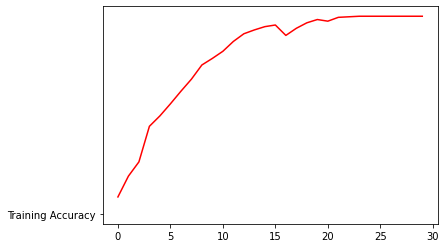

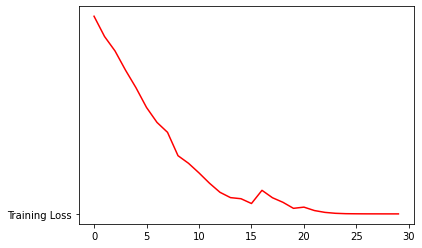

<Figure size 432x288 with 0 Axes>

In [106]:
from tensorflow.python.util.tf_export import InvalidSymbolNameError
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
loss=history.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'r',"Training Accuracy")
plt.figure()
plt.plot(epochs,loss,'r',"Training Loss")
plt.figure()

Saving 500t1.jpg to 500t1.jpg
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Giá trị dự đoán:  500


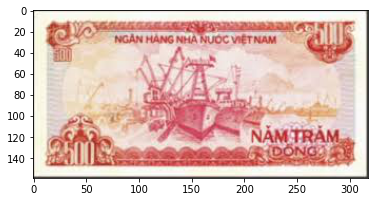

In [110]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=128)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

Saving 100k (4).jpg to 100k (4).jpg
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  100k


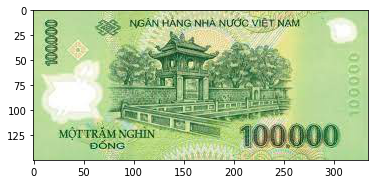

In [114]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=128)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])

Saving 200k3.jpg to 200k3.jpg
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Giá trị dự đoán:  200k


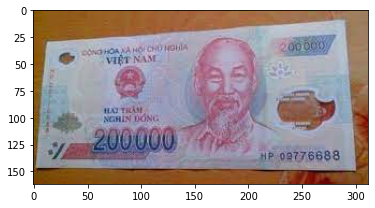

In [115]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(150,150))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=128)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])
